# Prepare the Data

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine  into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, how = "left")

# Display the table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID. 
g989_info = merged_data.loc[merged_data["Mouse ID"] =="g989", :]
g989_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"].isin(duplicate_ID)==False]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = cleaned_data["Mouse ID"].nunique()
new_mice_count

248

# Statistics

In [38]:
# Use groupby and summary statistical methods to calculate the properties for each drug regimen
summary_statistics_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns in the summary statistics DataFrame
summary_statistics_df = summary_statistics_df.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the summary statistics DataFrame
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

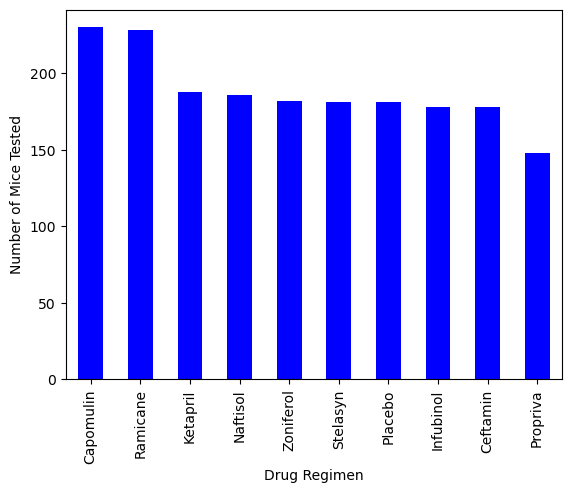

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_treatment = cleaned_data["Drug Regimen"].value_counts()
plot_pandas = mice_treatment.plot.bar(color="b", alpha=1)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

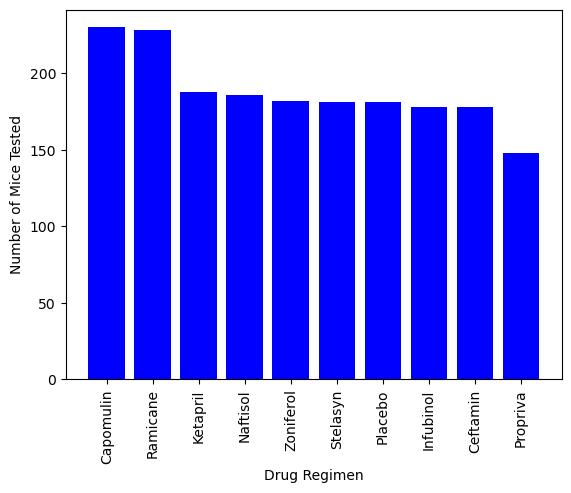

In [9]:
x_axis = mice_treatment.index.values
y_axis = mice_treatment.values

plt.bar(x_axis, y_axis, color = "b", alpha=1, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")


plt.show()

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last timepoint for each mouse
last_timepoint_data = cleaned_data.groupby('Mouse ID').max()['Timepoint']
greatest_df = pd.DataFrame(last_timepoint_data)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df= greatest_df.merge(cleaned_data, on=("Mouse ID","Timepoint"),how="left")
tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


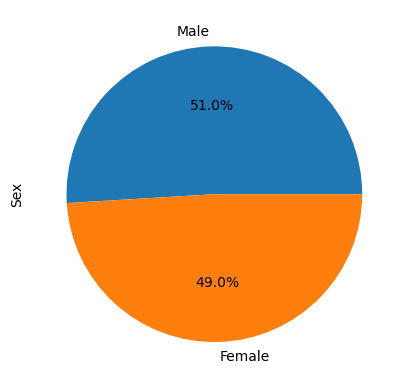

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_data = cleaned_data["Sex"].value_counts()
mice_gender_data.plot.pie(autopct="%1.1f%%")
plt.show()

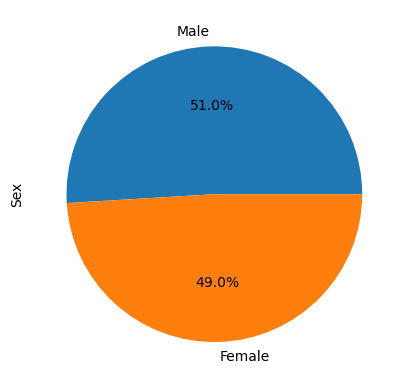

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = [51.00, 49.00]
colors = ["Blue", "orange"]
plot = mice_gender_data.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

for treatment in treatment_list:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


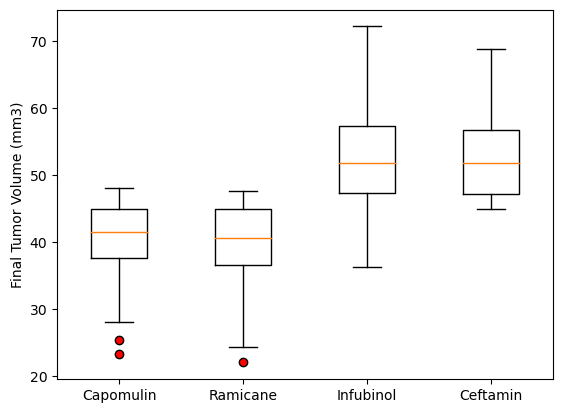

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume_list, labels=treatment_list, flierprops={"markerfacecolor": "r"})
plt.show()

# Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

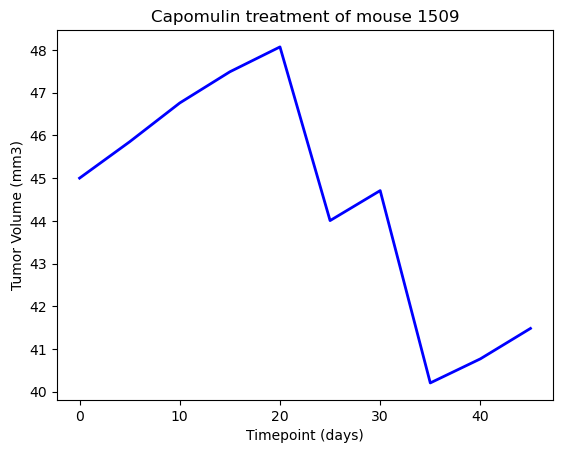

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin",:]
mouse_1509_df = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]
x_axis = mouse_1509_df["Timepoint"]
y_axis = mouse_1509_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatment of mouse 1509")
plt.plot(x_axis, y_axis, linewidth = 2, color = "b")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

C:\Users\fishd\AppData\Local\Temp\ipykernel_21448\3332878237.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor_volume =capomulin_data.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

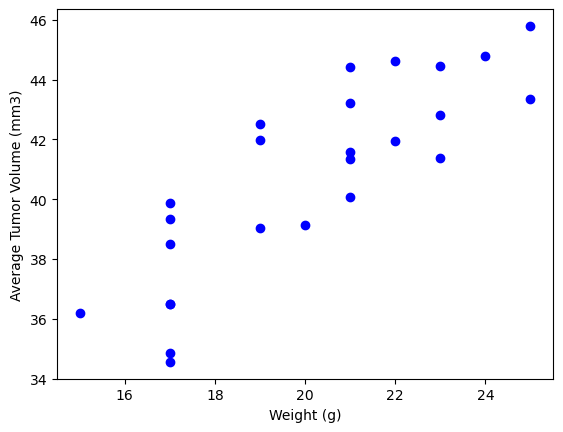

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
average_tumor_volume =capomulin_data.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"], marker="o", facecolors="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Correlation and Regression

The correlation between both factors is 0.84


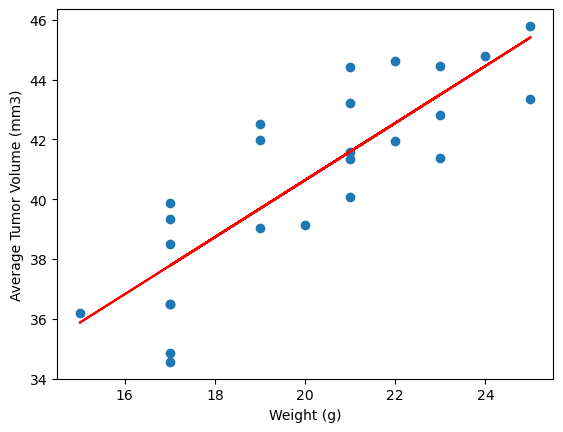

In [17]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"])
x_values = average_tumor_volume["Weight (g)"]
y_values = average_tumor_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between both factors is {round(correlation[0], 2)}")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()